<a href="https://colab.research.google.com/github/AbbasFAlhokri/AbbasFAlhokri/blob/main/prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [59]:
# Importing the required data 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sn
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import array
from numpy import argmax
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#import pycaret 
#from pycaret.classification import *

In [60]:
#!pip install sklearn_features
#!pip install pycaret 

# Load the data 
Loading the data we prepared previously 


In [61]:
# Load data that we prepared 
df = pd.read_csv('preprocessed_data.csv')
df.head()

,hour,day_of_week,month,year,day_off,temp,rain_1h,snow_1h,clouds_all,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm,traffic_volume
0,9,1,10,2012,0,15.13,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5545.0
1,10,1,10,2012,0,16.21,0.0,0.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4516.0
2,11,1,10,2012,0,16.43,0.0,0.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4767.0
3,12,1,10,2012,0,16.98,0.0,0.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5026.0
4,13,1,10,2012,0,17.99,0.0,0.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4918.0


# From the previous analysis we found the following corrolation metrix with traffic_volunm.

traffic_volume    1.000000

hour              0.355087

temp              0.139241

clouds_all        0.078210

Clear             0.052370

year              0.010384

Rain              0.008778

Thunderstorm      0.004931

Drizzle           0.001099

Smoke             0.000990

snow_1h          -0.002091

month            -0.004865

Squall           -0.005900

Haze             -0.010891

rain_1h          -0.013425

Clouds           -0.033277

Fog              -0.036782

Mist             -0.037965

Snow             -0.038194

holiday          -0.044235

day_of_week      -0.144165

day_off          -0.215541

In [62]:
# we notice from the above corrolation metrix, hour , temp, cloud_all, day_off and day_of_week are the most corrolated to target value.
X = df[['day_off', 'temp', 'clouds_all', 'hour','day_of_week']]
y = df['traffic_volume']

#Split the data into train set and test set


In [63]:
# Create train and test sets for the chosen features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create train and test sets for all features!
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(df, y, test_size=0.2, random_state=42)

# standardizing train and test data



To build a Machine learning model we need to do pipeline to increase the iteration cycle and to scale models.

![Machine Learning Pipeline]()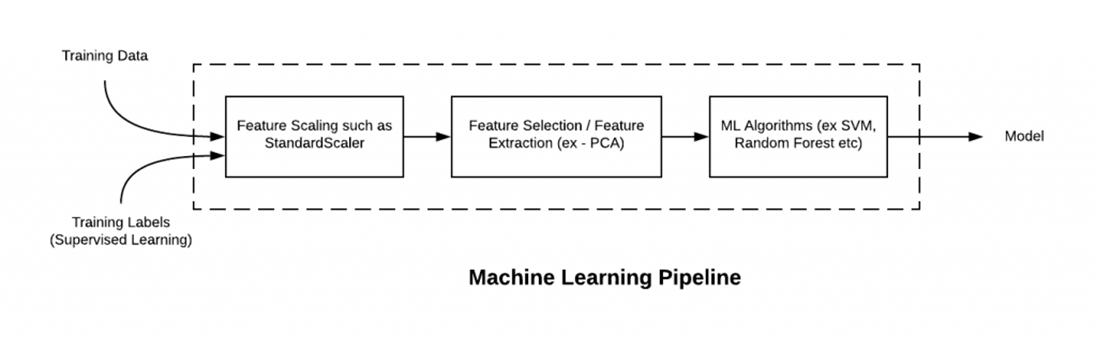

In [64]:
# Define piplines and use them on a x_train and x_test to standarize numerical variables and categorical variables
# we choose the categorical_variabal if the feature is orignally a categorical feature, e.g day_off that
# is extracted from hoilday (categorical feature) and day_of_week. 
numerical_variabl = ['hour', 'temp','day_of_week','clouds_all']
categorical_variabl = ['day_off']
# Assume the data is normally distributed.
# DataFrameSelector Transforms a DataFrame into a Series by selecting a single column by key.
#select the numerical feature
numerical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(numerical_variabl)),
    ('scaler', StandardScaler())])
# select the categorical feature 
categorical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(categorical_variabl))])

combined_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline_feature),
    ('cat_pipeline', categorical_pipeline_feature)])
# fit it via pipline
X_train_scalled = combined_pipeline.fit_transform(X_train)
X_test_scalled = combined_pipeline.transform(X_test)

In [65]:
# As we have done before for the selected feature, now we do it for all features. 
numerical_attributs = ['rain_1h', 'snow_1h', 'clouds_all', 'temp', 'hour', 'month','day_of_week', 'year']
categorical_attributs = ['Clouds', 'day_off', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 
                         'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
# Assume the data is normally distributed. 
#Let's select the numerical feature
numerical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(numerical_variabl)),
    ('scaler', StandardScaler())])
#Let's select the categorical feature 
categorical_pipeline_feature = Pipeline([
    ('selector', DataFrameSelector(categorical_variabl))])
# now let's combine both features to be fitted in
combined_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline_feature),
    ('cat_pipeline', categorical_pipeline_feature)])
X_all_train_scalled = combined_pipeline.fit_transform(X_train)
X_all_test_scalled = combined_pipeline.transform(X_test)

Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. 

fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to both calculate and do transformation.

# Testing Data via different Models

In [66]:
#since we are training on different models let's creat a function that takes model's name, and required paramters. 
def train_test_various_models(models, X_train, X_test, y_train, y_test):
    """ we will pass models as a dictionary to train 
    train and test given modele on given data"""
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        print(f"r2 score on test data using {model_name}: {r2_score(y_test, y_test_pred)}\n")
        print(f"mean squared error score on test data using {model_name}:", end=" "),
        print(f"{np.sqrt(mean_squared_error(y_test, y_test_pred))}\n")

# Testing Models

In [67]:
# create dictionary of the models that we use to trian our data.
models = {
    'linear_regression': LinearRegression(),
    'decision_tree_regresor': DecisionTreeRegressor(max_depth=5 , random_state = 0),
    'random_forest_regressor': RandomForestRegressor(max_depth=5, n_estimators=10, random_state = 0)}


#Result

In [68]:
# Let's see the result if we train the model with choson features!
train_test_various_models(models, X_train_std, X_test_std, y_train, y_test)

r2 score on test data using linear_regression: 0.18109911079698693

mean squared error score on test data using linear_regression: 1797.3141349775076

r2 score on test data using decision_tree_regresor: 0.9086209111715329

mean squared error score on test data using decision_tree_regresor: 600.3876222161126

r2 score on test data using random_forest_regressor: 0.913663008000418

mean squared error score on test data using random_forest_regressor: 583.588567289369



In [69]:
# Let's see the result if we train the model with all features!
train_test_various_models(models, X_all_train_std, X_all_test_std, y_all_train, y_all_test)

r2 score on test data using linear_regression: 0.19124403184116734

mean squared error score on test data using linear_regression: 1786.1464623385032

r2 score on test data using decision_tree_regresor: 0.9090652802888363

mean squared error score on test data using decision_tree_regresor: 598.9260249225606

r2 score on test data using random_forest_regressor: 0.9138077618457712

mean squared error score on test data using random_forest_regressor: 583.0991355539956



# Observation

Looking at the previous result, we can notice that using all features gives a slightly more r2 score than just selected features.

Moreover, we can notice Random forest regressor and decision tree regressor are better than Linear regression.

# Tuning parameters
Let's now try to play with the argument parameters for the 
Random forest regressor and decision tree regressor.
Also, we should do cross validation for both models to try increasing r2 score.

In [73]:
#Tune Max_depth and min_samples_leaf for the Decision Tree Regressor Model 
param_grid = [
    {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
]
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
grid.best_params_
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'max_depth': 12, 'min_samples_leaf': 50}
Best estimator:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Best score:  0.9374753237820235


In [ ]:
# Tune Max_depth and min_samples_leaf for the Random Forest Regressor Model 
param_grid = [
    {'max_depth': [5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300],
     'n_estimators': [10, 20 ,50, 75, 100]}
]
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'max_depth': 12, 'min_samples_leaf': 10, 'n_estimators': 100}
Best estimator:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best score:  0.9395158657317323


# Testing with Tunned Models

In [72]:
# Adjest the argument for the Random Forest Regressor and Decision Tree Regresor
models = {
    'best_randomforestregressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False),
    'best_decisiontreeregresor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'),
}



r2 score on test data using best_randomforestregressor: 0.945153028629616

mean squared error score on test data using best_randomforestregressor: 465.14102330473094

r2 score on test data using best_decisiontreeregresor: 0.9411285242284536

mean squared error score on test data using best_decisiontreeregresor: 481.90427596537626



# Result

In [74]:
train_test_various_models(models, X_all_train_std, X_all_test_std, y_all_train, y_all_test)


r2 score on test data using best_randomforestregressor: 0.9449407885750036

mean squared error score on test data using best_randomforestregressor: 466.04012705591276

r2 score on test data using best_decisiontreeregresor: 0.9411285242284536

mean squared error score on test data using best_decisiontreeregresor: 481.90427596537626



# Final prediction for the best models
 

In [101]:
Best_model=models['best_randomforestregressor']
y_test_pred = Best_model.predict(X_all_test_std)
# Conver the array into dataframe then save it in a new dataframe
df_test_pred = y_test.to_frame()
# Rename the target value
df_test_pred.rename(columns={"traffic_volume": "actual Value"}, inplace=True)
# Add the predicted value
df_test_pred['Predicted value'] = y_test_pred
df_test_pred.head()

,actual Value,Predicted value
216,372.0,375.951939
4199,4668.0,4709.974428
16922,4549.0,3044.194484
23931,4459.0,4769.588726
20845,1241.0,1323.129252


# Visulization for the best models
 

From the previous table, we want to plot each sample of real value and predicated value and the difference between them. 


In [109]:
# Let's take 15 sample.
number_samples= 15; 
# Take a sample point from the dataframe 
sample = df_test_pred.sample(n= number_samples , random_state=42)
# Find the absoulate value of the difference between Real Value and Predicted value.
sample['difference'] = np.abs(df_test_pred['Predicted value'] - df_test_pred['actual Value'])
# the following is the list of from 1 to number of samples.
number_samples_list=[]
for i in range(number_samples):
  number_samples_list.append(i+1)
  

Before plotting the figure let's understand zip function which we will mainly use to creat tubles of each sample in sample['Predicted value'] , sample.difference and number_samples_list. The following code illustrate that

In [110]:
print(list(zip(number_samples_list, sample['Predicted value'], sample.difference)))

[(1, 1456.9271398688768, 183.9271398688768), (2, 2689.5056794771053, 849.4943205228947), (3, 2850.5025858465197, 135.50258584651965), (4, 3819.9712319916575, 44.02876800834247), (5, 5340.228525498835, 20.771474501165358), (6, 4792.555881561353, 122.55588156135309), (7, 678.5581229634976, 14.441877036502433), (8, 4472.291385221039, 134.70861477896142), (9, 3445.917103198107, 1146.9171031981068), (10, 2850.4750259574384, 113.47502595743845), (11, 640.085384166059, 56.08538416605904), (12, 4555.983033588552, 24.016966411448266), (13, 4440.758197915277, 118.75819791527738), (14, 2572.3832188777415, 461.38321887774146), (15, 1177.8685673034086, 179.13143269659145)]


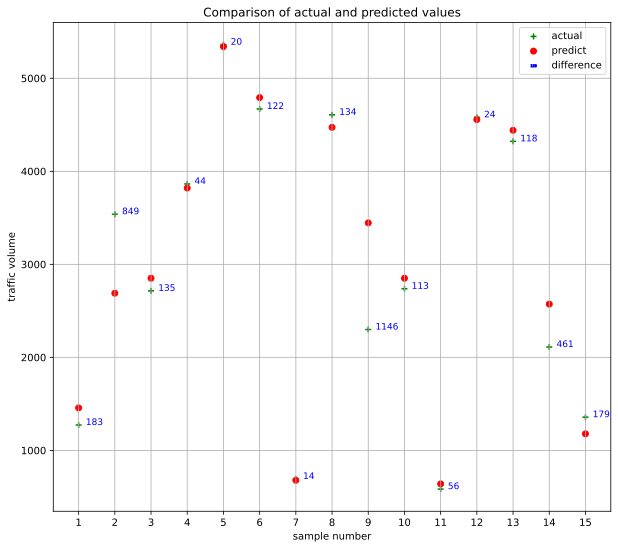

In [131]:
# Plot the predicted and actual samples 
plt.figure(figsize=[10,9])
plt.scatter(number_samples_list, sample['actual Value'], color='green', marker='+',label='actual')
plt.scatter(number_samples_list, sample['Predicted value'], color='red', marker='o', label='predict')
# Now we use zip function to itrate over it and plt the point of the difference.
for nu_sample, pre_value, diff_value in zip(number_samples_list, sample['actual Value'], sample.difference):
        # plto the numerical value of the  difference between the predicted value and actual value 
        # we dreft the x-axis by 0.1 for a visual porpous. 
        plt.text(nu_sample+0.2,pre_value, int(diff_value), color="blue", fontsize=9)
plt.scatter([], [], color='blue', marker='$123$', label='difference')
plt.legend()
plt.xticks(number_samples_list)
plt.grid()
plt.xlabel('sample number')
plt.ylabel('traffic volume')
plt.title("Comparison of actual and predicted values")
plt.savefig('Actual vs Predicted .png')